In [20]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  
main_directory = 'data/'

data = []
labels = []


In [21]:
chunk_size = 1000
for activity in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, activity)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)
                for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                    data.append(chunk)
                    labels.extend([activity] * len(chunk))

data = pd.concat(data, ignore_index=True)
data['label'] = labels

print(data.head())

   accelerometer_X  accelerometer_Y  accelerometer_Z label
0         1.000776         4.616021         8.576031  idle
1         0.718261         4.209007         8.446744  idle
2        -0.909797        -0.282516         9.203311  idle
3         5.099650         0.148441         8.418014  idle
4         1.762132        -0.162806         9.251195  idle


In [22]:
# характеристики і мітки
X = data.drop(columns=['label'])
y = data['label']

#розрахунок часових ознак
X['mean'] = X.mean(axis=1)
X['std'] = X.std(axis=1)
X['min'] = X.min(axis=1)
X['max'] = X.max(axis=1)

print(X.head())


   accelerometer_X  accelerometer_Y  accelerometer_Z      mean       std  \
0         1.000776         4.616021         8.576031  4.730943  3.093652   
1         0.718261         4.209007         8.446744  4.458004  3.160049   
2        -0.909797        -0.282516         9.203311  2.670333  4.626606   
3         5.099650         0.148441         8.418014  4.555368  3.397905   
4         1.762132        -0.162806         9.251195  3.616840  4.060855   

        min       max  
0  1.000776  8.576031  
1  0.718261  8.446744  
2 -0.909797  9.203311  
3  0.148441  8.418014  
4 -0.162806  9.251195  


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# масштаб даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data split and scaled successfully")

Data split and scaled successfully


In [27]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97      9306
     running       0.93      0.91      0.92     30609
      stairs       1.00      0.00      0.01      1537
     walking       0.80      0.90      0.85     16706

    accuracy                           0.89     58158
   macro avg       0.92      0.70      0.69     58158
weighted avg       0.90      0.89      0.88     58158



In [ ]:
# рандом форест
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      9306
     running       1.00      1.00      1.00     30609
      stairs       1.00      0.99      1.00      1537
     walking       1.00      1.00      1.00     16706

    accuracy                           1.00     58158
   macro avg       1.00      1.00      1.00     58158
weighted avg       1.00      1.00      1.00     58158



In [28]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

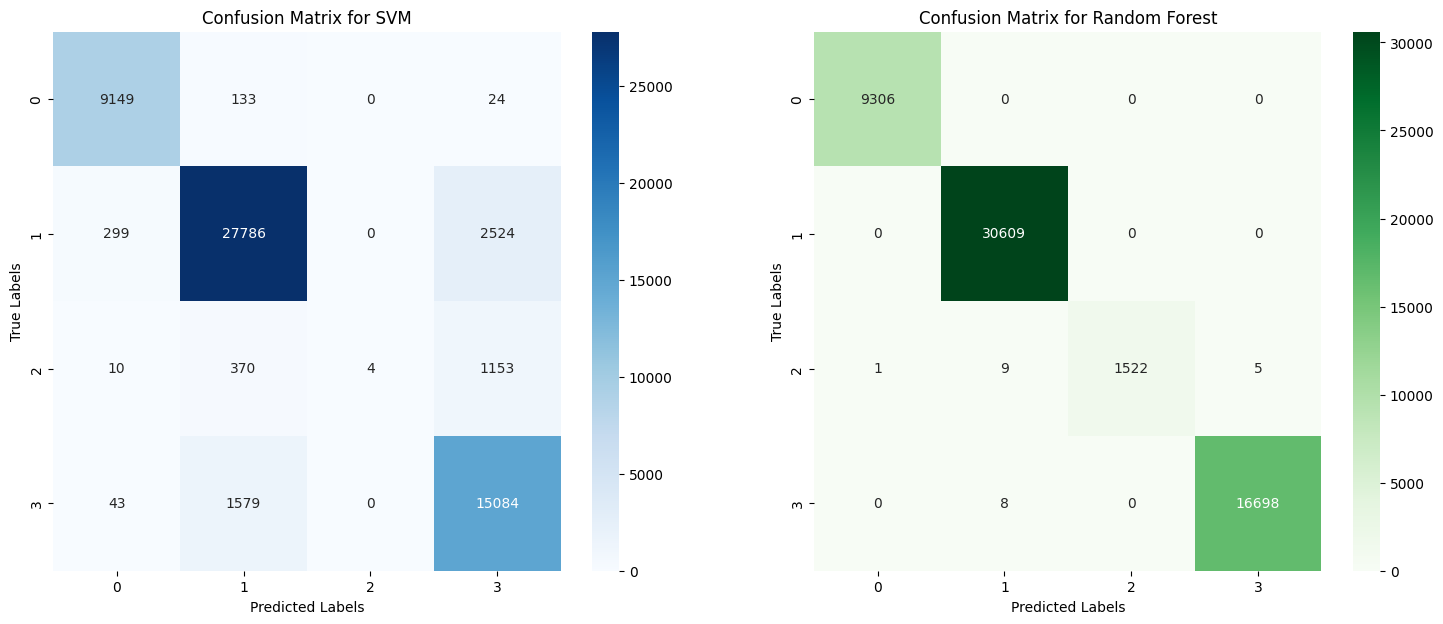

In [29]:
# два графіка-матриць для порівняння svm i рандом форест
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# SVM
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()

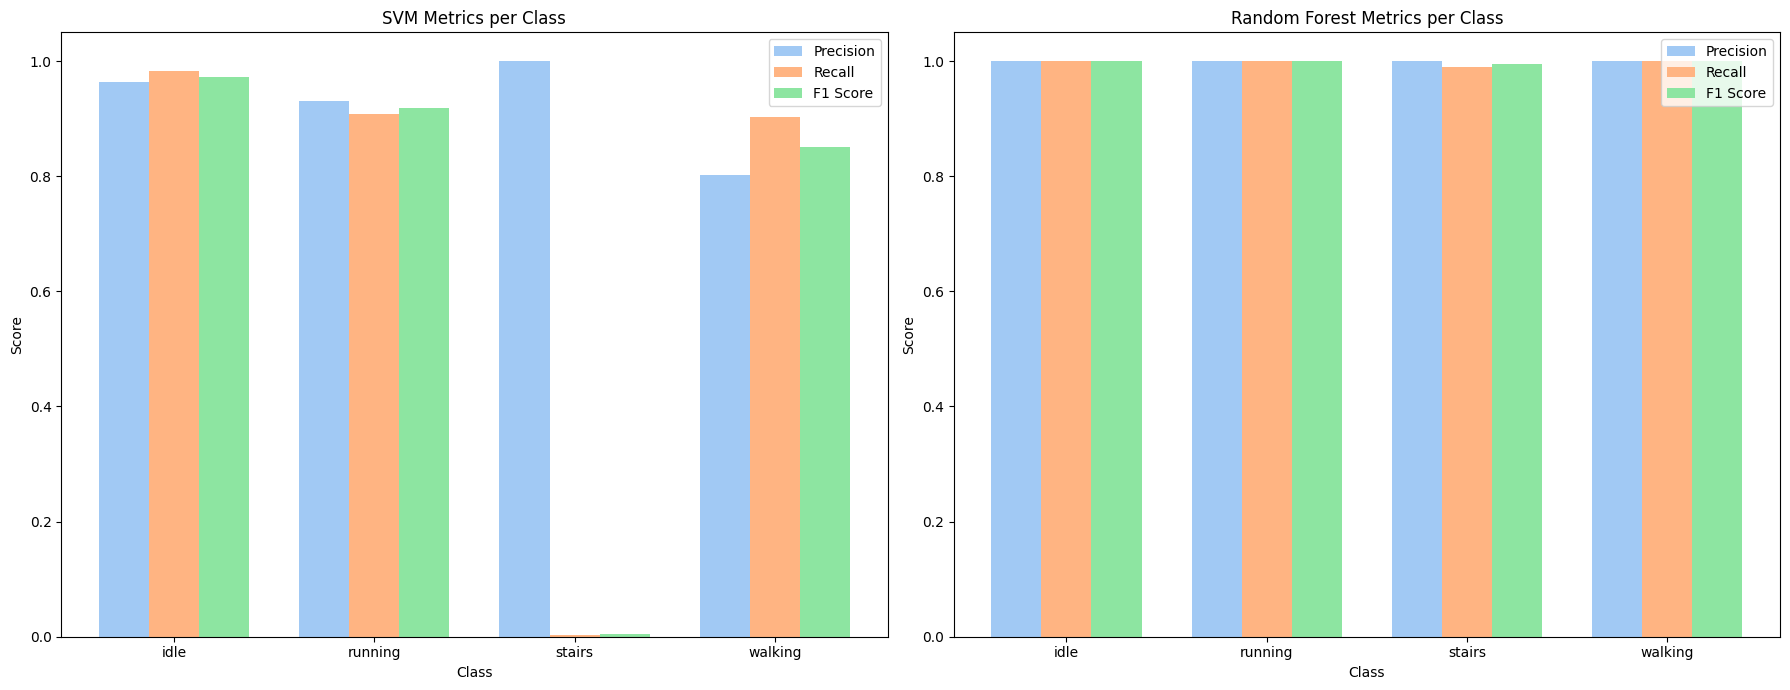

In [30]:
import seaborn as sns
colors = sns.color_palette("pastel", 3)

# Precision, Recall, F1 Score для кожного класу
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

svm_classes = list(svm_report.keys())[:-3]  #  витягуємо назви класів без урахування середніх значень
rf_classes = list(rf_report.keys())[:-3]

# SVM Metrics per Class, порівнюємо
svm_precision_per_class = [svm_report[cls]['precision'] for cls in svm_classes]
svm_recall_per_class = [svm_report[cls]['recall'] for cls in svm_classes]
svm_f1_per_class = [svm_report[cls]['f1-score'] for cls in svm_classes]

# Random Forest Metrics per Class, порівнюємо
rf_precision_per_class = [rf_report[cls]['precision'] for cls in rf_classes]
rf_recall_per_class = [rf_report[cls]['recall'] for cls in rf_classes]
rf_f1_per_class = [rf_report[cls]['f1-score'] for cls in rf_classes]

# Ширина стовпчиків
bar_width = 0.25

# Координати для SVM
x_svm = np.arange(len(svm_classes))


axes[0].bar(x_svm - bar_width, svm_precision_per_class, width=bar_width, label='Precision', color=colors[0])
axes[0].bar(x_svm, svm_recall_per_class, width=bar_width, label='Recall', color=colors[1])
axes[0].bar(x_svm + bar_width, svm_f1_per_class, width=bar_width, label='F1 Score', color=colors[2])
axes[0].set_title('SVM Metrics per Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Score')
axes[0].set_xticks(x_svm)
axes[0].set_xticklabels(svm_classes)
axes[0].legend()

# Координати для Random Forest
x_rf = np.arange(len(rf_classes))

axes[1].bar(x_rf - bar_width, rf_precision_per_class, width=bar_width, label='Precision', color=colors[0])
axes[1].bar(x_rf, rf_recall_per_class, width=bar_width, label='Recall', color=colors[1])
axes[1].bar(x_rf + bar_width, rf_f1_per_class, width=bar_width, label='F1 Score', color=colors[2])
axes[1].set_title('Random Forest Metrics per Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Score')
axes[1].set_xticks(x_rf)
axes[1].set_xticklabels(rf_classes)
axes[1].legend()

plt.tight_layout()
plt.show()


Висновки, які я зробила: з матриць видно, що модель Random Forest демонструє кращу класифікацію, оскільки більше значень розміщені по головній діагоналі. З другого графіку це також видно.